## project 2 - Bank Campaign

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

pd.options.display.max_columns=60

In [2]:
df=pd.read_csv('/Users/cff744/ds_course/ct16_cap1_ds4/project_2/data/bank/bank.csv', sep=';')

In [3]:
df['id']=range(1,df.shape[0]+1)

In [4]:
df['group']=1

In [4]:
df.loc[:, 'risk']=(df['default']=='yes').astype(int)
df.loc[:, 'resp']=(df['y']=='yes').astype(int)

In [ ]:
# add random number
import random
df.loc[:,'random1']=np.random.random_sample(45211)
df.loc[:,'random2']=np.random.random_sample(45211)

In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): ['age',
  'balance',
  'day',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'id',
  'risk',
  'resp'],
 dtype('O'): ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'y']}

In [21]:
def proc_means(df, output = '',pctl = [.01, .05, .25, .5, .75, .95, .99]):
    means = df.describe(include=['float64','int64'], percentiles=pctl).T
    row_cnt=df.shape[0]
    means['N'] = row_cnt
    means['Missing'] = (means['N'] - means['count'])
    means['Missing%'] = (means['N'] - means['count'])/means['N']
    if len(output) != 0:
        means.to_csv(output)
    return means

In [22]:
proc_means(df)

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,N,Missing,Missing%
age,45211.0,40.936210,10.618762,18.0,23.0,27.0,33.0,39.0,48.0,59.0,71.0,95.0,45211,0.0,0.0
balance,45211.0,1362.272058,3044.765829,-8019.0,-627.0,-172.0,72.0,448.0,1428.0,5768.0,13164.9,102127.0,45211,0.0,0.0
day,45211.0,15.806419,8.322476,1.0,2.0,3.0,8.0,16.0,21.0,29.0,31.0,31.0,45211,0.0,0.0
duration,45211.0,258.163080,257.527812,0.0,11.0,35.0,103.0,180.0,319.0,751.0,1269.0,4918.0,45211,0.0,0.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,1.0,1.0,2.0,3.0,8.0,16.0,63.0,45211,0.0,0.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,317.0,370.0,871.0,45211,0.0,0.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.9,275.0,45211,0.0,0.0
id,45211.0,22606.000000,13051.435847,1.0,453.1,2261.5,11303.5,22606.0,33908.5,42950.5,44758.9,45211.0,45211,0.0,0.0
risk,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,45211,0.0,0.0
resp,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,45211,0.0,0.0


## Logistic regression

In [5]:
df['pdays_missing'] = np.where(df['pdays']== -1, 1, 0)
#numeric_column_list = ['balance', 'day', 'duration', 'pdays', 'age', 'previous']
#categorical_column_list = ['job', 'marital','education','housing','loan','contact','poutcome']
df = pd.get_dummies(df).astype(int)

In [7]:
df.ix[df.age > 71, 'age'] = 71
df.ix[df.age < 23, 'age'] = 23

df.ix[df.balance > 13164.9, 'balance'] = 13164.9
df.ix[df.balance < 627, 'balance'] = 627

df.ix[df.duration > 1269, 'duration'] = 1269
df.ix[df.duration < 11, 'duration'] = 11

df.ix[df.campaign > 16, 'campaign'] = 16
df.ix[df.campaign < 1, 'campaign'] = 1

df.ix[df.previous > 8.9, 'previous'] = 8.9

df.ix[df.pdays ==-1, 'pdays'] = df['pdays'].mean()

In [8]:
df = df.rename(columns={'job_admin.': 'job_admin', 
                        'job_self-employed': 'job_self_employed', 
                        'job_blue-collar':'job_blue_collar'})

In [9]:
df.drop(['y_no','y_yes', 'default_no','default_yes'], axis=1, inplace=True)

In [7]:
df.drop(['contact_cellular','housing_yes', 'loan_no','marital_married', 'education_secondary', 
         'job_blue_collar', 'poutcome_unknown','month_may'], axis=1, inplace=True)

## univariate chart

In [9]:
import matplotlib.pyplot as plt
# display graphics in the browser window
# "cell magics"  %%
# "line magics" % 
%matplotlib inline

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


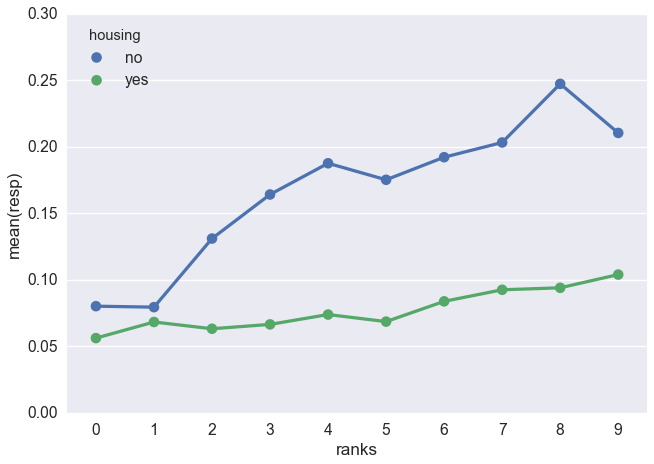

In [13]:
grouping = lambda x: pd.Series(pd.qcut(x,10,labels=False),index=x.index)
df['ranks'] = df.groupby('housing')['balance'].apply(grouping)

dplot=df.sort_index(by=['housing','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'housing', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


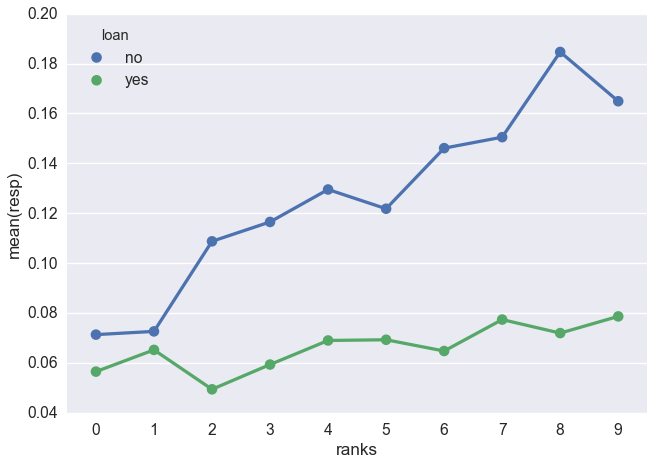

In [14]:
grouping = lambda x: pd.Series(pd.qcut(x,10,labels=False),index=x.index)
df['ranks'] = df.groupby('loan')['balance'].apply(grouping)

dplot=df.sort_index(by=['loan','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'loan', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


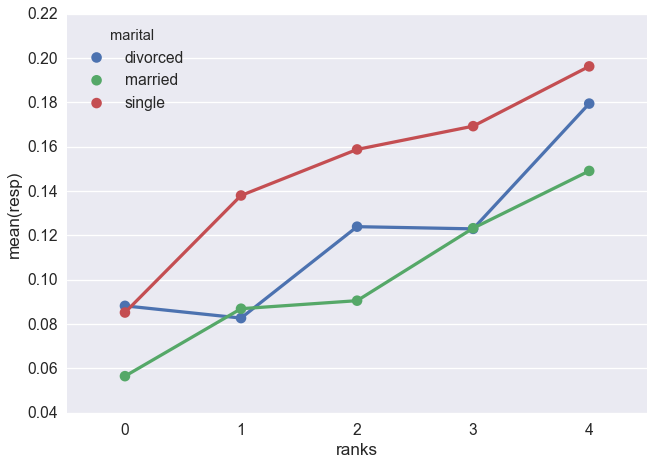

In [16]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('marital')['balance'].apply(grouping)

dplot=df.sort_index(by=['marital','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'marital', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


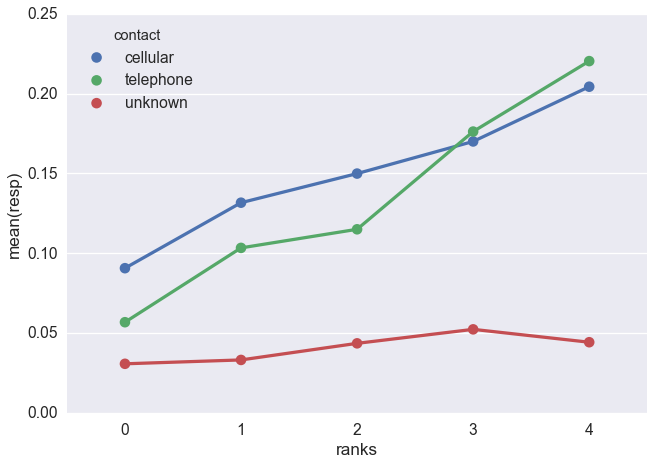

In [17]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('contact')['balance'].apply(grouping)

dplot=df.sort_index(by=['contact','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'contact', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


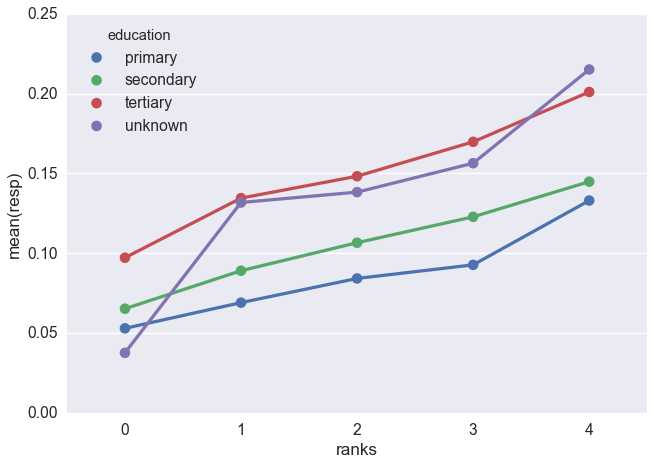

In [18]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('education')['balance'].apply(grouping)

dplot=df.sort_index(by=['education','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'education', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


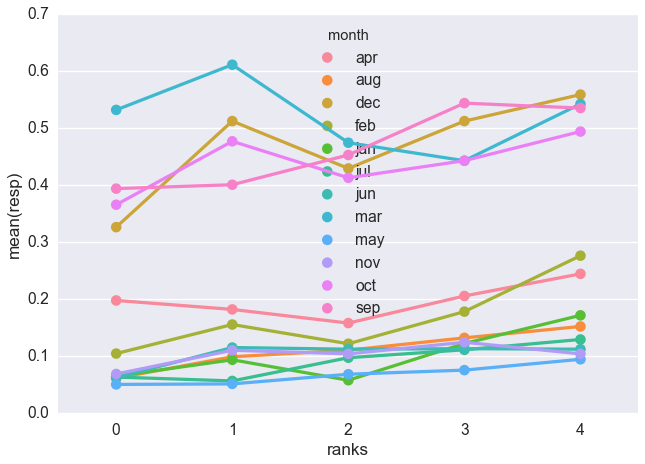

In [19]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('month')['balance'].apply(grouping)

dplot=df.sort_index(by=['month','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'month', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


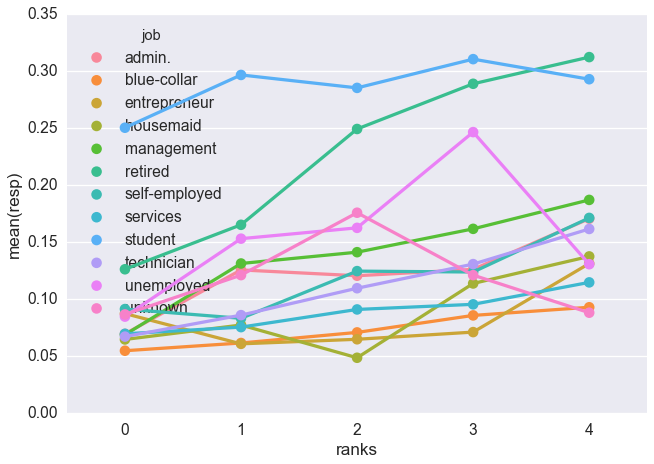

In [20]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('job')['balance'].apply(grouping)

dplot=df.sort_index(by=['job','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'job', ci=None, data=dplot)

In [11]:
pd.options.display.max_columns=60
pd.options.display.max_rows=100

In [ ]:
pd.pivot_table(df,index=['age'],columns =[], values=['resp'], aggfunc=np.mean)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


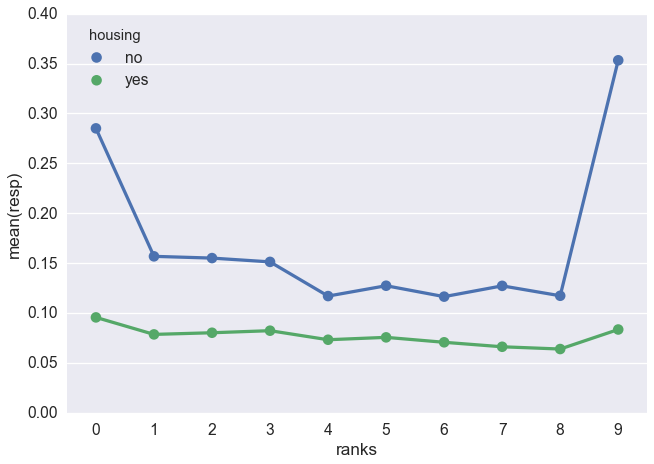

In [21]:
grouping = lambda x: pd.Series(pd.qcut(x,10,labels=False),index=x.index)
df['ranks'] = df.groupby('housing')['age'].apply(grouping)

dplot=df.sort_index(by=['housing','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'housing', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


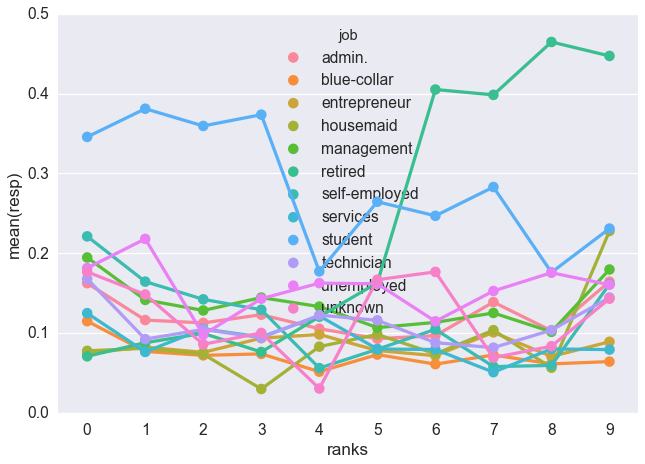

In [22]:
grouping = lambda x: pd.Series(pd.qcut(x,10,labels=False),index=x.index)
df['ranks'] = df.groupby('job')['age'].apply(grouping)

dplot=df.sort_index(by=['job','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'job', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


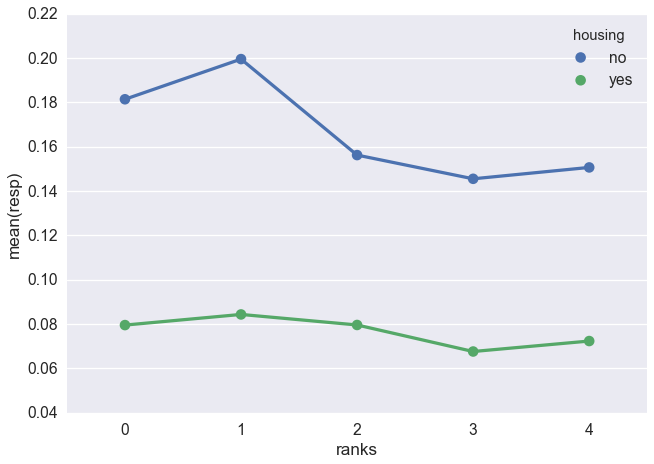

In [28]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('housing')['day'].apply(grouping)

dplot=df.sort_index(by=['housing','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'housing', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


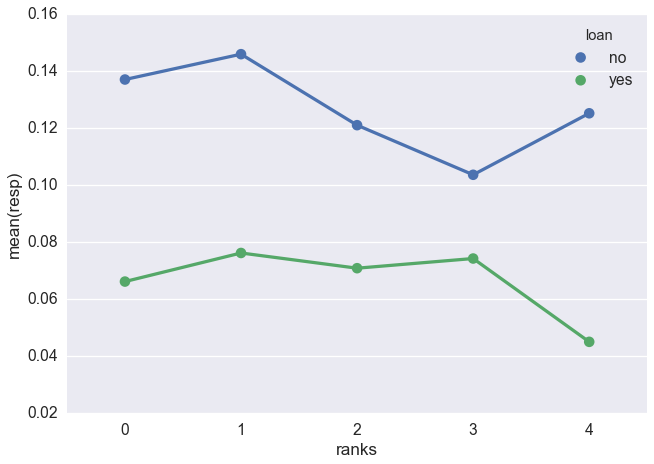

In [27]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('loan')['day'].apply(grouping)

dplot=df.sort_index(by=['loan','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'loan', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


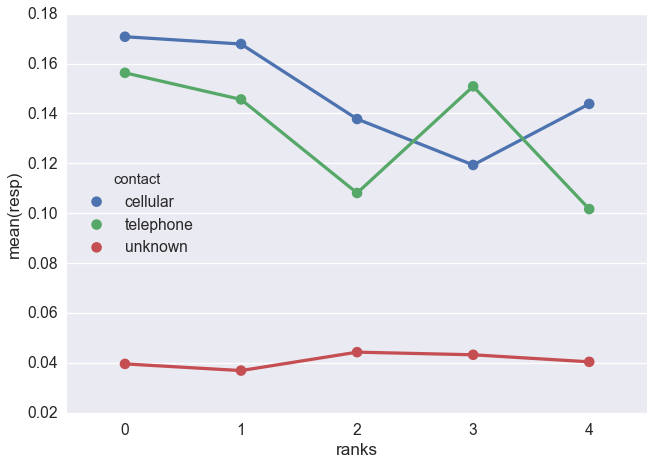

In [26]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('contact')['day'].apply(grouping)

dplot=df.sort_index(by=['contact','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'contact', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


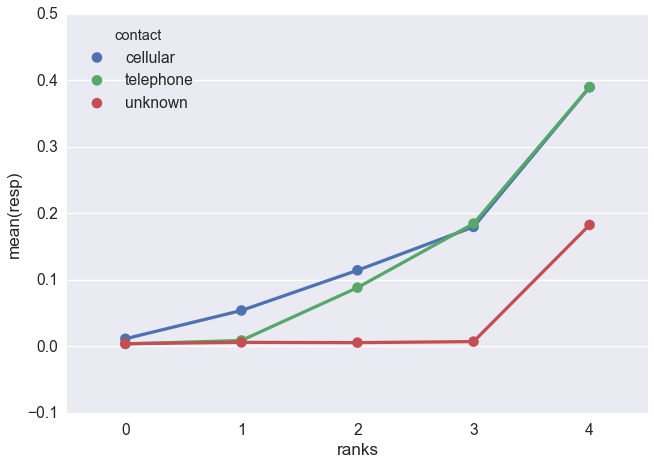

In [10]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('contact')['duration'].apply(grouping)

dplot=df.sort_index(by=['contact','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'contact', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


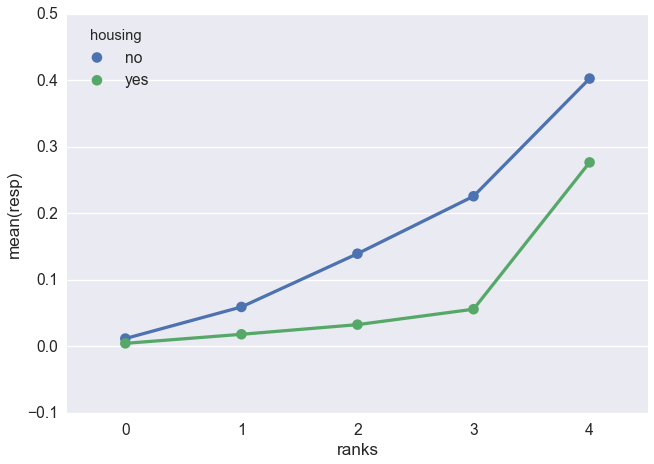

In [11]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('housing')['duration'].apply(grouping)

dplot=df.sort_index(by=['housing','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'housing', ci=None, data=dplot)

/Users/cff744/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


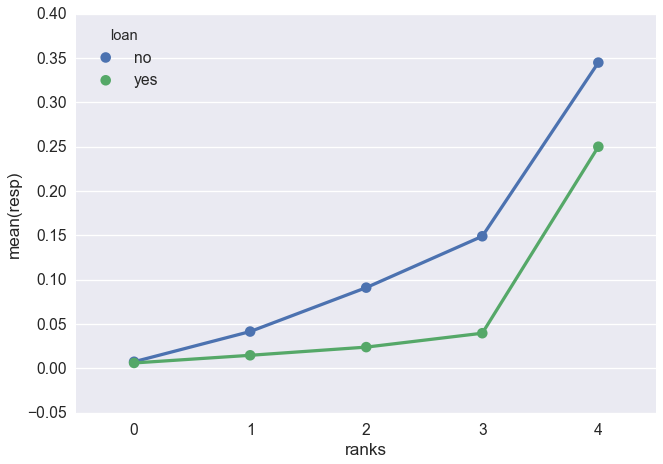

In [31]:
grouping = lambda x: pd.Series(pd.qcut(x,5,labels=False),index=x.index)
df['ranks'] = df.groupby('loan')['duration'].apply(grouping)

dplot=df.sort_index(by=['loan','ranks'], ascending=[True, True])

sn.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 1.8})
sn.pointplot(x='ranks', y='resp', hue = 'loan', ci=None, data=dplot)

In [ ]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)

In [6]:
df.ix[df.age > 71, 'age'] = 71
df.ix[df.age < 23, 'age'] = 23

df.ix[df.balance > 13164.9, 'balance'] = 13164.9
df.ix[df.balance < 627, 'balance'] = 627

df.ix[df.duration > 1269, 'duration'] = 1269
df.ix[df.duration < 11, 'duration'] = 11

df.ix[df.campaign > 16, 'campaign'] = 16
df.ix[df.campaign < 1, 'campaign'] = 1

df.ix[df.previous > 8.9, 'previous'] = 8.9

df.ix[df.pdays ==-1, 'pdays'] = df['pdays'].mean()

In [7]:
df['f_high_month']=df['month'].isin(['mar','sep', 'oct', 'dec']).astype(int)
df['f_median_month']=df['month'].isin(['apr','feb']).astype(int)

In [8]:
df['f_contactable']=df['contact'].isin(['cellular','telephone']).astype(int)
df['f_cellular'] = df['contact'].isin(['cellular']).astype(int)

df['f_student'] = df['job'].isin(['student']).astype(int)
df['f_retired'] = df['job'].isin(['retired']).astype(int)
df['f_job_low_resp'] = df['job'].isin(['services', 'entrepreneur', 'blue-collar', 'housemaid']).astype(int)

df['f_housing_n'] = df['housing'].isin(['no']).astype(int)

df['f_loan_n'] = df['loan'].isin(['no']).astype(int)

df['f_single'] = df['marital'].isin(['single']).astype(int)


df['f_edu_tertiary'] = df['education'].isin(['tertiary']).astype(int)
df['f_edu_unknown'] = df['education'].isin(['unknown']).astype(int)
df['f_edu_primary'] = df['education'].isin(['primary']).astype(int)

df['f_poutcome_success'] = df['poutcome'].isin(['success']).astype(int)
df['f_poutcome_unknown'] = df['poutcome'].isin(['unknown']).astype(int)

df['f_age_lt_26'] = (df['age'] < 26).astype(int)
df['f_age_gt_60'] = (df['age']> 60).astype(int)


In [9]:
df['f_contactable_bal'] = df.f_contactable * df.balance
df['f_contactable_day'] = df.f_contactable * df.day
df['f_contactable_duration'] = df.f_contactable * df.duration

df['f_house_n_bal']=df.f_housing_n * df.balance
df['f_loan_n_bal'] = df.f_loan_n * df.balance

df['f_house_n_duration']=df.f_housing_n * df.duration
df['f_loan_n_duration'] = df.f_loan_n * df.duration

df['f_student_age']=df.f_student * df.age
df['f_retired_age'] = df.f_retired * df.age

In [19]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): ['age',
  'day',
  'duration',
  'campaign',
  'id',
  'group',
  'risk',
  'resp',
  'f_high_month',
  'f_median_month',
  'f_contactable',
  'f_cellular',
  'f_student',
  'f_retired',
  'f_job_low_resp',
  'f_housing_n',
  'f_loan_n',
  'f_single',
  'f_edu_tertiary',
  'f_edu_unknown',
  'f_edu_primary',
  'f_poutcome_success',
  'f_poutcome_unknown',
  'f_age_lt_26',
  'f_age_gt_60',
  'f_contactable_day',
  'f_contactable_duration',
  'f_house_n_duration',
  'f_loan_n_duration',
  'f_student_age',
  'f_retired_age'],
 dtype('float64'): ['balance',
  'pdays',
  'previous',
  'f_contactable_bal',
  'f_house_n_bal',
  'f_loan_n_bal'],
 dtype('O'): ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'y']}

In [10]:
target = 'resp'
features = ['age',
  'day',
  'duration',
  'campaign',
 # 'risk',
  'f_high_month',
  'f_median_month',
  'f_contactable',
  'f_cellular',
  'f_student',
  'f_retired',
  'f_job_low_resp',
  'f_housing_n',
  'f_loan_n',
  'f_single',
  'f_edu_tertiary',
  'f_edu_unknown',
  'f_edu_primary',
  'f_poutcome_success',
  'f_poutcome_unknown',
  'f_age_lt_26',
  'f_age_gt_60',
  'f_contactable_day',
  'f_contactable_duration',
  'f_house_n_duration',
  'f_loan_n_duration',
  'f_student_age',
  'f_retired_age',
  'balance',
  'pdays',
    'pdays_missing',
  'previous',
  'f_contactable_bal',
  'f_house_n_bal',
  'f_loan_n_bal']

In [11]:
X = df[features]
Y = df[target]

In [12]:
from sklearn.cross_validation import train_test_split

# splits x -> x_train, x_test
#        y -> y_train, y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.20, random_state=987)

print len(X_train), len(X_test)

36168 9043


In [13]:
import pandas as pd
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel = "linear")
selector = RFE(estimator, 30, step=1)
selector = selector.fit(X_train, Y_train)

selector.ranking_

In [14]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
y_logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(Y_test, y_logistic_pred)
print "Accuracy: %3f" % (logistic_accuracy)

Accuracy: 0.900033


In [15]:
from sklearn import metrics

print metrics.confusion_matrix(Y_test, y_logistic_pred)
print metrics.classification_report(Y_test, y_logistic_pred)

print Y_test.value_counts()
print pd.Series(y_logistic_pred).value_counts()

[[7762  218]
 [ 686  377]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      7980
          1       0.63      0.35      0.45      1063

avg / total       0.89      0.90      0.89      9043

0    7980
1    1063
Name: resp, dtype: int64
0    8448
1     595
dtype: int64


In [17]:
import matplotlib.pyplot as plt
# display graphics in the browser window
# "cell magics"  %%
# "line magics" % 
%matplotlib inline

In [10]:
target1 = 'risk'
target2 = 'resp'
other = []
id_col = 'id'
features = df.columns.difference([target1]).difference([target2]).difference(other).difference([id_col])

In [10]:
features

Index([u'age', u'balance', u'campaign', u'contact_cellular',
       u'contact_telephone', u'contact_unknown', u'day', u'duration',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'housing_no', u'housing_yes', u'job_admin',
       u'job_blue_collar', u'job_entrepreneur', u'job_housemaid',
       u'job_management', u'job_retired', u'job_self_employed',
       u'job_services', u'job_student', u'job_technician', u'job_unemployed',
       u'job_unknown', u'loan_no', u'loan_yes', u'marital_divorced',
       u'marital_married', u'marital_single', u'month_apr', u'month_aug',
       u'month_dec', u'month_feb', u'month_jan', u'month_jul', u'month_jun',
       u'month_mar', u'month_may', u'month_nov', u'month_oct', u'month_sep',
       u'pdays', u'pdays_missing', u'poutcome_failure', u'poutcome_other',
       u'poutcome_success', u'poutcome_unknown', u'previous'],
      dtype='object')

In [11]:
X = df[features]
Y = df[target2]

In [12]:
from sklearn.cross_validation import train_test_split

# splits x -> x_train, x_test
#        y -> y_train, y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.20, random_state=987)

print len(X_train), len(X_test)

36168 9043


In [13]:
import pandas as pd
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
y_logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(Y_test, y_logistic_pred)
print "Accuracy: %3f" % (logistic_accuracy)

Accuracy: 0.902466


In [15]:
from sklearn import metrics

print metrics.confusion_matrix(Y_test, y_logistic_pred)
print metrics.classification_report(Y_test, y_logistic_pred)

print Y_test.value_counts()
print pd.Series(y_logistic_pred).value_counts()

[[7773  207]
 [ 675  388]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      7980
          1       0.65      0.37      0.47      1063

avg / total       0.89      0.90      0.89      9043

0    7980
1    1063
Name: resp, dtype: int64
0    8448
1     595
dtype: int64


In [ ]:
# Print the feature ranking
print("Feature ranking:")
#for f in range(X_train.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

featureCount=47

for f in range(featureCount):
    print ("%d. %s %d (%f)" % (f + 1, cols[indices[f]], indices[f], importances[indices[f]]))

## score logistic regression model on whole sample

In [28]:
df['logistic_score']= logistic_model.predict_proba(X)[:,1]  # take first column

In [29]:
proc_means(df)

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,N,Missing,Missing%
age,45211.0,40.887660,10.384267,23.000000,23.000000,27.000000,33.000000,39.000000,48.000000,59.000000,71.000000,71.000000,45211,0.0,0.0
balance,45211.0,1558.039519,2107.893727,627.000000,627.000000,627.000000,627.000000,627.000000,1428.000000,5768.000000,13164.810000,13164.900000,45211,0.0,0.0
day,45211.0,15.806419,8.322476,1.000000,2.000000,3.000000,8.000000,16.000000,21.000000,29.000000,31.000000,31.000000,45211,0.0,0.0
duration,45211.0,254.375993,234.779511,11.000000,11.000000,35.000000,103.000000,180.000000,319.000000,751.000000,1269.000000,1269.000000,45211,0.0,0.0
campaign,45211.0,2.691403,2.585740,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,8.000000,16.000000,16.000000,45211,0.0,0.0
pdays,45211.0,73.871592,86.628527,1.000000,40.197828,40.197828,40.197828,40.197828,40.197828,317.000000,370.000000,871.000000,45211,0.0,0.0
previous,45211.0,0.524689,1.457817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.810000,8.900000,45211,0.0,0.0
id,45211.0,22606.000000,13051.435847,1.000000,453.100000,2261.500000,11303.500000,22606.000000,33908.500000,42950.500000,44758.900000,45211.000000,45211,0.0,0.0
risk,45211.0,0.018027,0.133049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,45211,0.0,0.0
resp,45211.0,0.116985,0.321406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,45211,0.0,0.0


In [30]:
dscore=df.ix[:,['id','logistic_score']]

In [68]:
df2 = pd.merge(df, dscore, on='id', how='inner')

In [77]:
target1 = 'risk'
target2 = 'resp'
other = ['y_no','y_yes', 'default_no','default_yes', 'logistic_score']
id_col = 'id'
features = df2.columns.difference([target1]).difference([target2]).difference(other).difference([id_col])

In [78]:
X = df2[features]
Y = df2[target2]

In [79]:
from sklearn.cross_validation import train_test_split

# splits x -> x_train, x_test
#        y -> y_train, y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.20, random_state=987)

print len(X_train), len(X_test)

36168 9043


In [80]:
import xgboost as xgb

preds2 = {}
final_params= {'n_estimators': 600, 'max_depth': 8,'learning_rate': 0.05}
for model in [
            xgb.XGBClassifier(**final_params)
            ]:
    model.fit(X_train, Y_train)

In [81]:
y_xgb_pred = model.predict(X_test)
xgb_accuracy = accuracy_score(Y_test, y_xgb_pred)
print "Accuracy: %3f" % (xgb_accuracy)

Accuracy: 0.907553


In [82]:
from sklearn import metrics

print metrics.confusion_matrix(Y_test, y_xgb_pred)
print metrics.classification_report(Y_test, y_xgb_pred)

[[7672  308]
 [ 528  535]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      7980
          1       0.63      0.50      0.56      1063

avg / total       0.90      0.91      0.90      9043



In [48]:
target1 = 'risk'
target2 = 'resp'
other = []
id_col = 'id'
features = df.columns.difference([target1]).difference([target2]).difference(other).difference([id_col])

In [49]:
X = df[features]
Y = df[target2]

In [50]:
from sklearn.cross_validation import train_test_split

# splits x -> x_train, x_test
#        y -> y_train, y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.20, random_state=987)

print len(X_train), len(X_test)

36168 9043


In [57]:
import xgboost as xgb

preds2 = {}
final_params= {'n_estimators': 1000, 'max_depth': 8,'learning_rate': 0.05}
for model in [
            xgb.XGBClassifier(**final_params)
            ]:
    model.fit(X_train, Y_train)

In [59]:
y_xgb_pred = model.predict(X_test)
xgb_accuracy = accuracy_score(Y_test, y_xgb_pred)
print "Accuracy: %3f" % (xgb_accuracy)

Accuracy: 0.907995


In [60]:
from sklearn import metrics

print metrics.confusion_matrix(Y_test, y_xgb_pred)
print metrics.classification_report(Y_test, y_xgb_pred)

[[7674  306]
 [ 526  537]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      7980
          1       0.64      0.51      0.56      1063

avg / total       0.90      0.91      0.90      9043



In [62]:
df['risk'].mean()

0.018026586450200173

In [19]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)

In [20]:
from sklearn.cross_validation import train_test_split

# splits x -> x_train, x_test
#        y -> y_train, y_test
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,
                                                    test_size=0.20, random_state=987)

print len(X_train), len(X_test)

36168 9043


In [21]:
import pandas as pd
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
y_logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(Y_test, y_logistic_pred)
print "Accuracy: %3f" % (logistic_accuracy)

Accuracy: 0.902134


In [23]:
# predict class labels for the test set
predicted = logistic_model.predict(X_test)
print predicted

[0 0 0 ..., 0 0 0]


In [24]:
from sklearn import metrics

print metrics.confusion_matrix(Y_test, y_logistic_pred)
print metrics.classification_report(Y_test, y_logistic_pred)

[[7772  208]
 [ 677  386]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      7980
          1       0.65      0.36      0.47      1063

avg / total       0.89      0.90      0.89      9043



In [25]:
X = df[features]
Y = df[target2]

In [36]:
from sklearn.cross_validation import train_test_split

# splits x -> x_train, x_test
#        y -> y_train, y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.20, random_state=987)

print len(X_train), len(X_test)

36168 9043


In [37]:
from sklearn.decomposition import PCA

reducer = PCA(n_components = 36)
reduced_X_train = reducer.fit_transform(X_train)

reduced_X_test = reducer.transform(X_test)

In [38]:
logistic_model = LogisticRegression()
logistic_model.fit(reduced_X_train, Y_train)
y_logistic_pred = logistic_model.predict(reduced_X_test)
logistic_accuracy = accuracy_score(Y_test, y_logistic_pred)
print "Accuracy: %3f" % (logistic_accuracy)

Accuracy: 0.902908


In [39]:
from sklearn import metrics

print metrics.confusion_matrix(Y_test, y_logistic_pred)
print metrics.classification_report(Y_test, y_logistic_pred)

[[7786  194]
 [ 684  379]]
             precision    recall  f1-score   support

          0       0.92      0.98      0.95      7980
          1       0.66      0.36      0.46      1063

avg / total       0.89      0.90      0.89      9043



In [ ]:
from sklearn.feature_selection import VarianceThreshold as VT
X =
sel = VT(threshold=(.8*(1-0.8)))
sel.fit_transform(X)

In [ ]:
# selectKbest
